<a href="https://colab.research.google.com/github/iamtanishqjain/CNN_CIFAR10/blob/main/CIFAR_10_CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt



# --- 1. Load and Preprocess the CIFAR-10 Dataset ---

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
NUM_CLASSES = 10
CLASS_NAMES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Normalization


In [5]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [6]:
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [7]:
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


#Define the CNN Model Architecture

In [8]:
def create_cnn_model():
    """Defines a simple CNN architecture for CIFAR-10 classification."""
    model = Sequential([
        # First Convolutional Block: 32 filters, 3x3 kernel, ReLU activation
        # Input shape must be specified in the first layer: (32, 32, 3) for CIFAR-10 color images
        Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),  # Dropout helps prevent overfitting

        # Second Convolutional Block: 64 filters
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        # Transition to Dense Layers
        Flatten(),  # Flattens the 3D output to a 1D vector

        # Dense Block (Fully Connected)
        Dense(512, activation='relu'),
        Dropout(0.5),

        # Output Layer: 10 neurons (one for each class) with softmax for probability distribution
        Dense(NUM_CLASSES, activation='softmax')
    ])
    return model

In [9]:
model = create_cnn_model()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

#Compile the Model

In [10]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#Train the Model

In [11]:
BATCH_SIZE = 64
EPOCHS = 10 # You can increase this (e.g., to 25-50) for better results in Colab

print("\nStarting model training...")
history = model.fit(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_test, y_test),
    shuffle=True,
    verbose=1 # Show progress bar
)
print("Training complete.")


Starting model training...
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.3213 - loss: 1.8234 - val_accuracy: 0.5770 - val_loss: 1.1805
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5629 - loss: 1.2095 - val_accuracy: 0.6470 - val_loss: 1.0050
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6379 - loss: 1.0254 - val_accuracy: 0.6893 - val_loss: 0.8714
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6848 - loss: 0.9065 - val_accuracy: 0.7222 - val_loss: 0.7947
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7086 - loss: 0.8277 - val_accuracy: 0.7255 - val_loss: 0.8009
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7324 - loss: 0.7624 - val_accuracy: 0.7473 - val_loss: 0.7322
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7501 - loss: 0.7066 - val_accuracy: 0.7583 - val_loss: 0.6999
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7654 - l

#Evaluate and Visualize Result

313/313 - 1s - 3ms/step - accuracy: 0.7782 - loss: 0.6575

Test accuracy: 77.82%


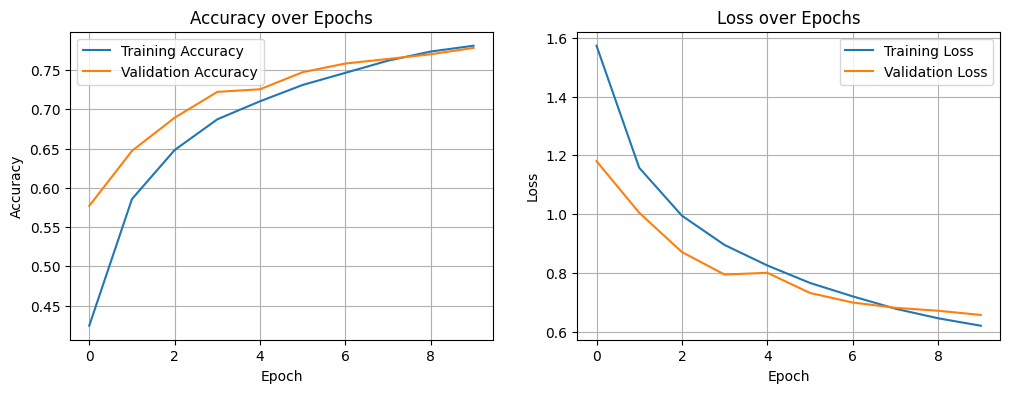

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

--- Prediction Example ---
Image Index: 2371
True Class: deer
Predicted Class: deer (Confidence: 92.30%)


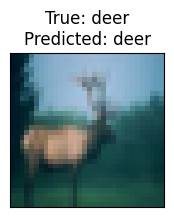

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc*100:.2f}%")

# Plot training history (Accuracy and Loss over epochs)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

# --- 6. Make a Prediction Example ---
# Take a random sample from the test set
sample_index = np.random.randint(0, len(x_test))
sample_image = x_test[sample_index]
true_label_one_hot = y_test[sample_index]
# Get the integer index of the true label
true_label_index = np.argmax(true_label_one_hot)

# Keras models expect a batch of data, so we expand the dimensions
image_for_prediction = np.expand_dims(sample_image, axis=0)
predictions = model.predict(image_for_prediction)
predicted_label_index = np.argmax(predictions[0])

# Get the class names
true_class = CLASS_NAMES[true_label_index]
predicted_class = CLASS_NAMES[predicted_label_index]
confidence = predictions[0][predicted_label_index] * 100

print(f"\n--- Prediction Example ---")
print(f"Image Index: {sample_index}")
print(f"True Class: {true_class}")
print(f"Predicted Class: {predicted_class} (Confidence: {confidence:.2f}%)")

# Display the image
plt.figure(figsize=(2, 2))
plt.imshow(sample_image)
plt.title(f"True: {true_class}\nPredicted: {predicted_class}")
plt.xticks([])
plt.yticks([])
plt.show()